# Probabilidade, Método de Monte Carlo (MCM), Amostragem por Hipercubo Latino (LHS) e Incerteza e Variabilidade



In [148]:
import numpy as np
from scipy.stats import qmc
from scipy.stats import norm
from scipy.stats import betabinom
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns 

n_amostras = 1000
# Como queremos apenas uma lista de números, teremos 1 dimensão.
n_dimensoes = 1 
# Usar uma semente (seed) torna a geração de números "aleatórios" reproduzível.
# Remova ou altere o valor para obter uma nova sequência de números a cada execução.
seed = 42

## Amostragem pelo Método de Monte Carlo

In [56]:
amostra_binomial_mm = np.random.binomial(n=n_ensaios, p=prob_sucesso, size=n_amostras)

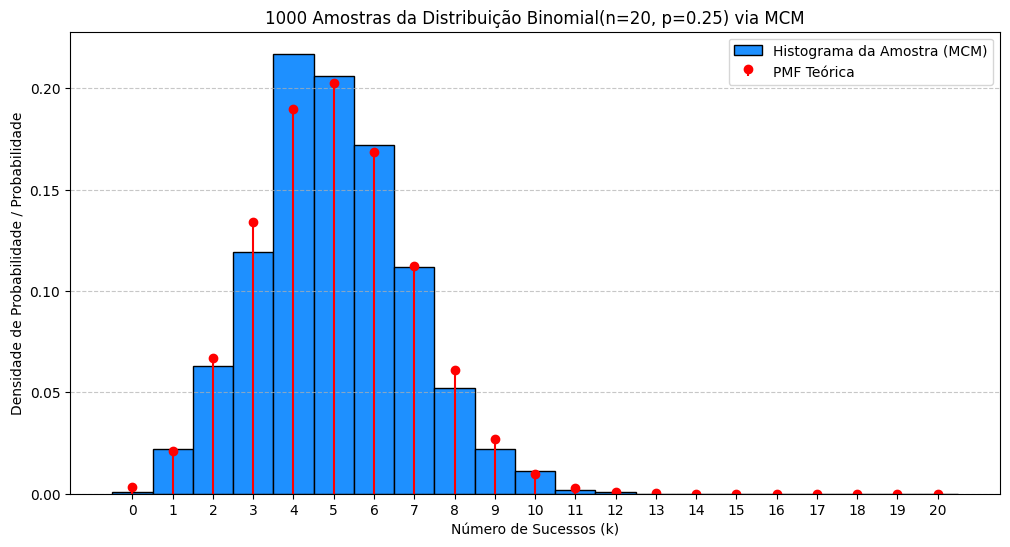

In [57]:
plt.figure(figsize=(12, 6))
# Definimos os limites dos bins para que cada barra represente um número inteiro
bins = np.arange(0, n_ensaios + 2) - 0.5
plt.hist(amostra_binomial_mm, bins=bins, density=True, color='dodgerblue', edgecolor='black', label='Histograma da Amostra (MCM)')

# Sobrepor a Função de Massa de Probabilidade (PMF) teórica
# A PMF dá a probabilidade exata de cada resultado inteiro
k_valores = np.arange(0, n_ensaios + 1)
pmf_teorica = binom.pmf(k_valores, n=n_ensaios, p=prob_sucesso)
# Usamos 'stem' para um gráfico de "pirulito", ideal para PMFs
plt.stem(k_valores, pmf_teorica, 'r', markerfmt='ro', linefmt='r-', basefmt=' ', label='PMF Teórica')

plt.title(f'1000 Amostras da Distribuição Binomial(n={n_ensaios}, p={prob_sucesso}) via MCM')
plt.xlabel('Número de Sucessos (k)')
plt.ylabel('Densidade de Probabilidade / Probabilidade')
plt.xticks(k_valores) # Garante que o eixo x mostre apenas os inteiros
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Amostragem pelo Método Hipercubo Latino

In [53]:
# Inicializa o amostrador de Hipercubo Latino (LHS)
# d: número de dimensões
sampler = qmc.LatinHypercube(d=n_dimensoes, seed=seed)

# Gera n_amostras pontos uniformemente distribuídos no intervalo [0, 1]
# O resultado terá o formato (n_amostras, n_dimensoes)
amostra_unitaria = sampler.random(n=n_amostras)

print(f"\nFormato da amostra unitária (LHS): {amostra_unitaria.shape}")
print("As 5 primeiras amostras no intervalo [0, 1]:\n", amostra_unitaria[:5].flatten())


Formato da amostra unitária (LHS): (1000, 1)
As 5 primeiras amostras no intervalo [0, 1]:
 [0.56322604 0.99656112 0.6961414  0.94130263 0.33290582]


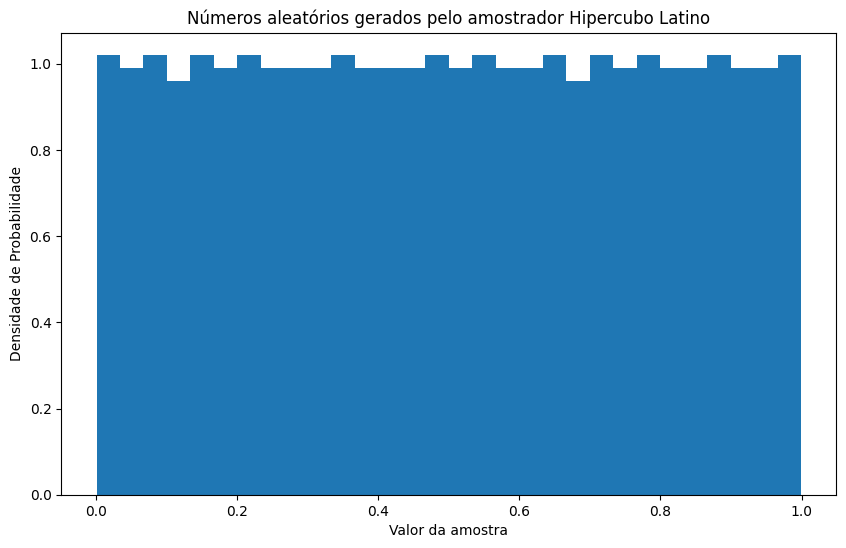

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(amostra_unitaria, density=True, bins=30)
ax.set_title('Números aleatórios gerados pelo amostrador Hipercubo Latino')
ax.set_xlabel('Valor da amostra')
ax.set_ylabel('Densidade de Probabilidade')
plt.show()
plt.close()


As 10 primeiras amostras convertidas para a Distribuição Binomial:
 [ 5. 11.  6.  8.  4.  6.  1.  5.  7.  4.]


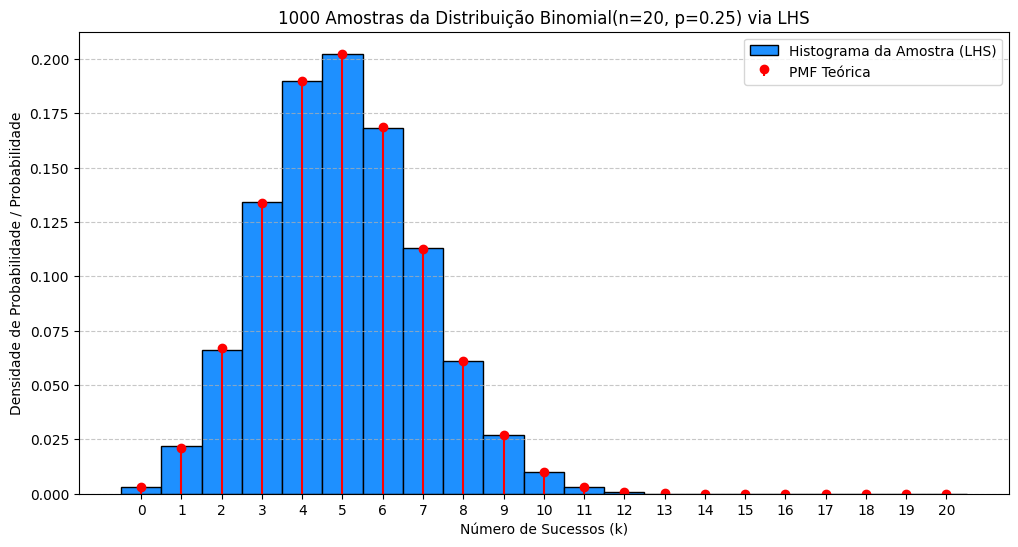

In [55]:
# Parâmetros para a Distribuição Binomial
n_ensaios = 20        # (n) Número de vezes que o experimento é repetido (ex: 20 lançamentos de moeda)
prob_sucesso = 0.25   # (p) Probabilidade de sucesso em cada ensaio


# --- 3. Transformar para a Distribuição Binomial ---

# Usamos a ppf da binomial com os três parâmetros: q, n, p
# O resultado será um array de números inteiros entre 0 e 20.
amostra_binomial = binom.ppf(amostra_unitaria, n=n_ensaios, p=prob_sucesso)

print("\nAs 10 primeiras amostras convertidas para a Distribuição Binomial:\n", amostra_binomial[:10].flatten())


# --- 4. Visualização dos Resultados ---

# Para uma distribuição discreta, um histograma com barras centradas nos inteiros é ideal
plt.figure(figsize=(12, 6))
# Definimos os limites dos bins para que cada barra represente um número inteiro
bins = np.arange(0, n_ensaios + 2) - 0.5
plt.hist(amostra_binomial, bins=bins, density=True, color='dodgerblue', edgecolor='black', label='Histograma da Amostra (LHS)')

# Sobrepor a Função de Massa de Probabilidade (PMF) teórica
# A PMF dá a probabilidade exata de cada resultado inteiro
k_valores = np.arange(0, n_ensaios + 1)
pmf_teorica = binom.pmf(k_valores, n=n_ensaios, p=prob_sucesso)
# Usamos 'stem' para um gráfico de "pirulito", ideal para PMFs
plt.stem(k_valores, pmf_teorica, 'r', markerfmt='ro', linefmt='r-', basefmt=' ', label='PMF Teórica')

plt.title(f'1000 Amostras da Distribuição Binomial(n={n_ensaios}, p={prob_sucesso}) via LHS')
plt.xlabel('Número de Sucessos (k)')
plt.ylabel('Densidade de Probabilidade / Probabilidade')
plt.xticks(k_valores) # Garante que o eixo x mostre apenas os inteiros
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Incerteza e Variabilidade

### Modelo só com variabilidade

Exemplo retirado do livro "Risk Analysis. A Quantitative Guide" de David Vose.

> Considere um grupo de 10 jurados selecionados aleatoriamente de uma população na qual o percentual de mulheres é de $50\%$, $0.2\%$ possuem deficiência visual severa e $1.1\%$ pertencem a povos originários. A defesa gostaria de ter pelo menos um membro do juri do sexo feminino e com deficiência visual ou pertecente a povos originários ou ambos. Qual a probabiidade de ter pelo menos um desses jurados no juri?

Neste problema não há incerteza e pode ser resolvido diretamente:

* Probabilidade de uma pessoa não pertencer ao povos originários nem ter deficência visual:

  $$(1-0.002)*(1-0.011) = 0.987022 $$

* Probabilidade de ter deficiência visual ou pertencer a povo originário ou ambos:

  $$1-0.987022=0.012978$$

* Probabilidade de ser mulher e pertencer aos povos originários e ter deviciência visual ou ambos:

  $$(0.50)*(0.012978)=0.006489$$

* Probablilidade de pelo menos um jurado mulher que pertença ao povos originários ou tenha deficiência visual ou ambos:

  $$ 1 - (1- 0.006489)^{10} = 0.06303$$

Essa probabilidade permite representar a variabilidade na composição do juri.

### Modelo com incerteza

Suponha que a prevalência de uma doença X em um população com prevalência estimada por $\text{Beta} \sim (11,91)$ (Não se preocupe que em aulas posteriores você irá compreender este parâmetro). 

Você seleciona 20 indivíduos desta população. Qual o número de com a doença X que estarão presentes na sua amostra?

Neste caso você tem uma incerteza sobre o valor da prevalência. Isso é muito comum pois o valor da prevalência só poderia ser conhecido se você examinasse a totalidade dos indivíduos com provas diagnósticas com $100\%$ de sensibilidade e especificidade, o que é praticamente impossível.

Vamos gerar gráfico da distribuição Beta para avaliar a incerteza sobre a preval6encia.


[0.05665954 0.15250215 0.10264483 0.07810368 0.06732639 0.10324474
 0.06296687 0.13614238 0.12083625 0.13771104 0.19090794]


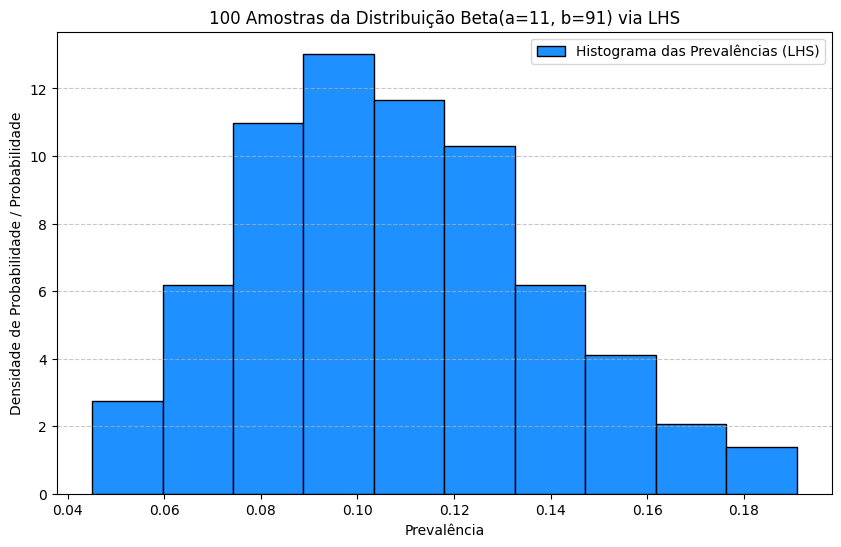

In [178]:
# Vamos amostrar 50 valores de um distribuição beta utilizada para modelar a incerteza no parâmetro probabilidade de cara

n_amostras = 100
seed=42
amostra_unitaria = sampler.random(n=n_amostras)

# Obtendo 50 valores de uma distribuição beta com parâmetros a=12, b=11, equivale propbabilidade média de 52%
probabilidades = beta.ppf(amostra_unitaria, 11, 91)

# Vamos imprimir os primeiros 10 valores de prevalência
print(probabilidades[0:11].flatten())

plt.figure(figsize=(10,6))
plt.hist(probabilidades, density=True, color='dodgerblue', edgecolor='black', label='Histograma das Prevalências (LHS)')
plt.title(f'{n_amostras} Amostras da Distribuição Beta(a=11, b=91) via LHS')
plt.xlabel('Prevalência')
plt.ylabel('Densidade de Probabilidade / Probabilidade')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Vamos plotar o efeito da incerteza sobre o número de animais positivos na  amostra de 20 animais.

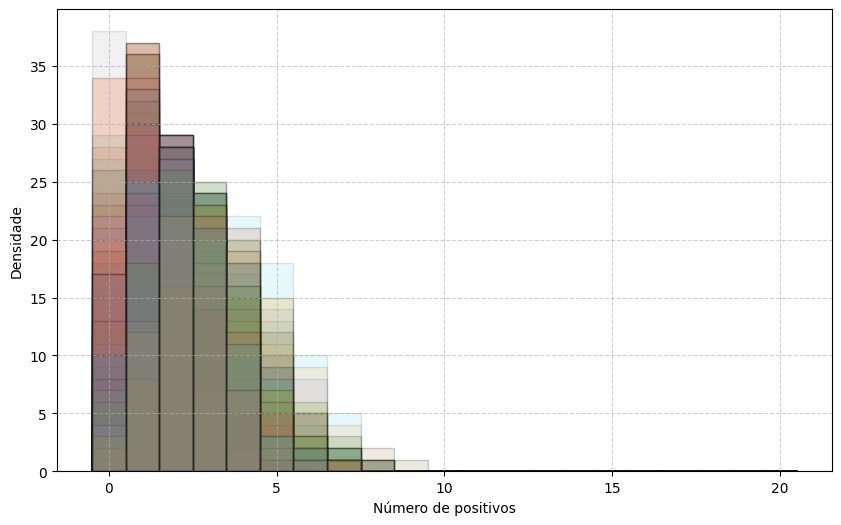

In [157]:
n_ensaios = 20
n_amostras = 100
seed=42
amostra_unitaria = sampler.random(n=n_amostras)
bins = np.arange(0, n_ensaios + 2) - 0.5
fig, ax = plt.subplots(figsize=(10,6))

for probabilidade in probabilidades:
    positivos = binom.ppf(amostra_unitaria, n=n_ensaios, p=probabilidade)
    plt.hist(positivos, bins=bins, edgecolor='black', alpha= 0.1, label='Histograma do número de positivos na amostra')
ax.set_xlabel('Número de positivos')
ax.set_ylabel('Densidade')
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()
    

### Incerteza Total

Para simular a incerteza total, vamos utilizar o método de amostragem do hipercubo latino para simular a incerteza no parâmetro $p$, gerando valores que representam adequadamente a distribuição beta(11,91).

Para simular a variabilidade, para cada valor de $p$ obtemos o número de positivos esperado considerando o número de ensaios ($20$). Esse é um processo de amostragem segundo o Método de Monte Carlo. Para que haja uma estabilização do resultado utilizamos números grandes (>10000), nesse caso 50000 simulações. 

In [173]:
n_ensaios = 20
n_simulacoes = 50000
a = 11
b = 91

# Vamos gerar 50000 valoes de prevalência com LHS
amostra_unitaria = sampler.random(n=n_simulacoes)
prevalencias = beta.ppf(amostra_unitaria, a=a, b=b)

# Para cada prevalência vamos gerar número de animais positivos em um lote de 20 animais
positivos = binom.rvs(n=n_ensaios, p=prevalencias)

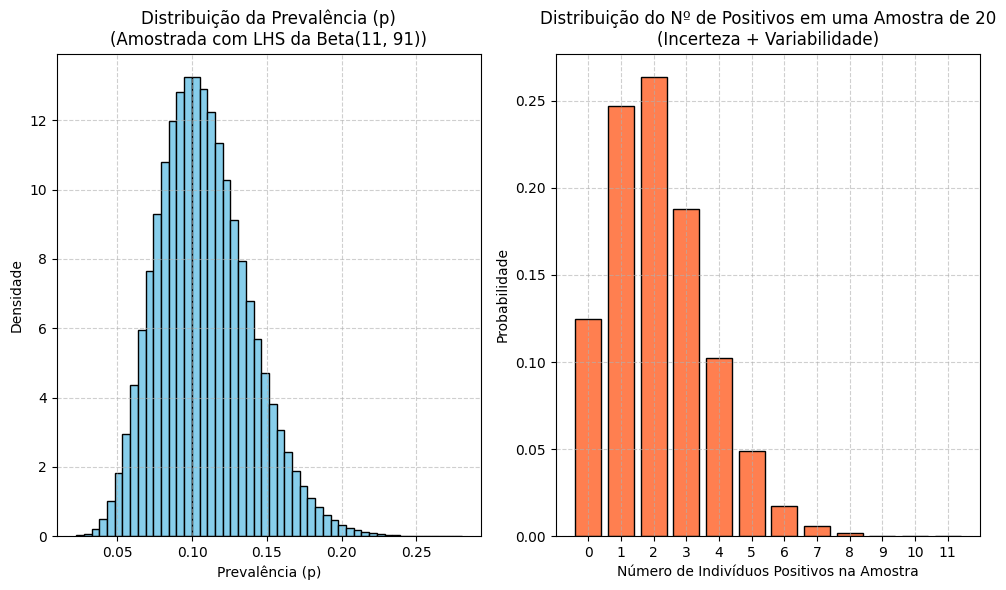

In [179]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,6)) 

# Gráfico 1: Distribuição das prevalências amostradas (Incerteza)
ax1.hist(prevalencias, bins=50, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Distribuição da Prevalência (p)\n(Amostrada com LHS da Beta(11, 91))')
ax1.set_xlabel('Prevalência (p)')
ax1.set_ylabel('Densidade')
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico 2: Distribuição final do número de casos positivos
# Contamos a frequência de cada resultado (0, 1, 2, ... positivos)
# Aqui utlizamos a contagem de valores em oposição ao histograma por serem valores discretos e
# não haver a necessidade de utilizar bins_corretos = np.arange(max(valores)+2) - 0.5
valores, contagens = np.unique(positivos, return_counts=True)
ax2.bar(valores, contagens / n_simulacoes, color='coral', edgecolor='black', width=0.8)
ax2.set_title(f'Distribuição do Nº de Positivos em uma Amostra de {n_ensaios}\n(Incerteza + Variabilidade)')
ax2.set_xlabel('Número de Indivíduos Positivos na Amostra')
ax2.set_ylabel('Probabilidade')
ax2.set_xticks(np.arange(min(valores), max(valores)+1)) # Garante ticks inteiros
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [181]:
# ---  Análise Estatística dos Resultados Finais ---

media_casos = np.mean(positivos)
mediana_casos = np.median(positivos)
percentil_5 = np.percentile(positivos, 5)
percentil_95 = np.percentile(positivos, 95)

print("--- Análise da Simulação de Casos Positivos ---")
print(f"Número de Simulações: {n_simulacoes}")
print(f"Média de casos positivos por amostra: {media_casos:.2f}")
print(f"Mediana de casos positivos por amostra: {mediana_casos:.0f}")
print(f"Intervalo de Credibilidade de 90%: O número de casos positivos ficou entre {percentil_5:.0f} e {percentil_95:.0f} em 90% das simulações.")

--- Análise da Simulação de Casos Positivos ---
Número de Simulações: 50000
Média de casos positivos por amostra: 2.16
Mediana de casos positivos por amostra: 2
Intervalo de Credibilidade de 90%: O número de casos positivos ficou entre 0 e 5 em 90% das simulações.


Vamos calcular o valor da prevalência média e o número de casos esperados a partir dessa prevalência:

In [188]:
prev_media = prevalencias.mean()
num_casos_esperados = prev_media*n_ensaios
print(f'A prevalência média é {prev_media:.4f}')
print(f'O número de casos positvios esperado é {num_casos_esperados:0.2f}')

A prevalência média é 0.1078
O número de casos positvios esperado é 2.16
